In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

#import multipolyfit as mpf

In [2]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [3]:
# Importing the dataset
dataset = pd.read_csv('regression_ready.csv')
dataset.head()

,Opening,Budget,Year,Ticket_Price,Ratings,actor_Jason Lee,actor_Ed Helms,actor_Angelina Jolie,actor_Lee Armstrong,actor_Billy Connolly,...,genre_ Music,genre_ History,genre_ Comedy,genre_ Adventure,genre_Animation,genre_ Drama,genre_ Thriller,genre_ Fantasy,genre_ Horror,genre_ War
0,247966675,245000000,15,8.43,0.93,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,220009584,620181382,17,8.97,0.91,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,208806270,150000000,15,8.43,0.71,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,191271109,250000000,15,8.43,0.75,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,179139142,250000000,16,8.65,0.91,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# drop rows with missing data
cleaned_df = dataset.dropna()
# create dummy variables
#cleaned_df = pd.get_dummies(cleaned_df)
cleaned_df.head()

,Opening,Budget,Year,Ticket_Price,Ratings,actor_Jason Lee,actor_Ed Helms,actor_Angelina Jolie,actor_Lee Armstrong,actor_Billy Connolly,...,genre_ Music,genre_ History,genre_ Comedy,genre_ Adventure,genre_Animation,genre_ Drama,genre_ Thriller,genre_ Fantasy,genre_ Horror,genre_ War
0,247966675,245000000,15,8.43,0.93,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,220009584,620181382,17,8.97,0.91,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,208806270,150000000,15,8.43,0.71,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,191271109,250000000,15,8.43,0.75,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,179139142,250000000,16,8.65,0.91,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
# X = cleaned_df.iloc[:, 1:].values
# X = cleaned_df.iloc[:, [1,2]].values
# X = cleaned_df.loc[:, ['Budget', 'Year', 'Ratings']].values

X = cleaned_df.loc[:, ['Budget', 'Year', 'month_May', 'month_Sept', 'actor_Robert Downey Jr.']].values
y = cleaned_df.iloc[:,0].values

In [92]:
X.shape

(175, 5)

In [93]:
y = y.reshape((-1, 1))
y
y.shape

(175, 1)

In [94]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((175, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, :]
SL = 0.1

X_Modeled = backwardElimination(X_opt, SL)

In [95]:
from sklearn.cross_validation import train_test_split
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_Modeled, y, test_size = 0.1, random_state = 0)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# pass the order of your polynomial here
poly_reg = PolynomialFeatures(degree = 3)

In [97]:
# convert to be used further to linear regression
X_poly = poly_reg.fit_transform(X_opt_train)
X_poly

array([[1.00e+00, 1.00e+00, 4.00e+07, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 1.15e+08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 1.00e+00, 1.37e+08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 3.00e+08, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 7.60e+07, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [98]:
#
poly_reg.fit(X_poly, y_opt_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [99]:
# create a Linear Regressor 
lin_reg_2 = LinearRegression()

# fit this to Linear Regressor
lin_reg_2.fit(X_poly, y_opt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
poly_pred = lin_reg_2.predict(poly_reg.fit_transform(X_opt_test))
poly_pred

array([[7.34574127e+07],
       [7.22459534e+07],
       [8.82846268e+07],
       [7.91788054e+07],
       [7.12174944e+07],
       [8.91012788e+07],
       [1.14208209e+08],
       [9.61245745e+07],
       [7.25283536e+07],
       [9.19445334e+07],
       [7.05428946e+07],
       [8.36611127e+07],
       [1.40805746e+08],
       [7.14847354e+07],
       [7.07496660e+07],
       [7.29526416e+07],
       [7.25514262e+07],
       [1.00628557e+08]])

In [101]:
lin_reg_2.score(poly_reg.fit_transform(X_opt_test),y_opt_test)

0.5363919050926953

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_opt_test,poly_pred)

641146697682400.8

In [103]:
X_poly.shape

(157, 35)

In [104]:
X_opt_train.shape

(157, 4)

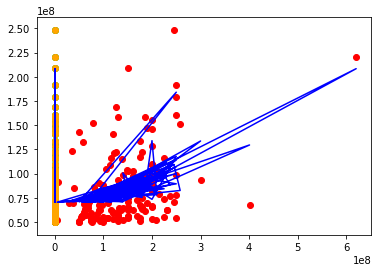

In [105]:
# plt.scatter(X[:,1], y, color = 'red')
plt.scatter(X_opt_train[:,0], y_opt_train, color = 'yellow')
plt.scatter(X_opt_train[:,1], y_opt_train, color = 'red')
plt.scatter(X_opt_train[:,2], y_opt_train, color = 'green')
plt.scatter(X_opt_train[:,3], y_opt_train, color = 'orange')
# plt.scatter(X[:,4], y, color = 'lightgreen')
# plt.scatter(X[:,5], y, color = 'cyan')
plt.plot(X_opt_train, lin_reg_2.predict(X_poly), color = 'blue')
plt.show()